### Get Data

In [1]:
!gdown 14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ # Ảnh Tsukuba
!gdown 1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn # ảnh Aloe

Downloading...
From: https://drive.google.com/uc?id=14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ
To: /content/tsukuba.zip
100% 354k/354k [00:00<00:00, 33.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
To: /content/Aloe_images.zip
100% 1.32M/1.32M [00:00<00:00, 34.2MB/s]


In [2]:
!unzip /content/tsukuba.zip -d /content/tsukuba
!unzip /content/Aloe_images.zip

Archive:  /content/tsukuba.zip
mapname:  conversion of  failed
 extracting: /content/tsukuba/left.png  
 extracting: /content/tsukuba/right.png  
 extracting: /content/tsukuba/groundtruth.png  
Archive:  /content/Aloe_images.zip
  inflating: Aloe/Aloe_left_1.png    
  inflating: Aloe/Aloe_right_3.png   
  inflating: Aloe/Aloe_right_1.png   
  inflating: Aloe/Aloe_right_2.png   
  inflating: Aloe/Disparity_map_corr.png  


### Cài đặt thuật toán

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
left_img_path = '/content/Aloe/Aloe_left_1.png'
right_img_path = '/content/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

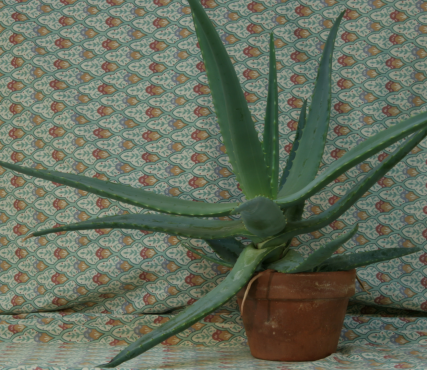

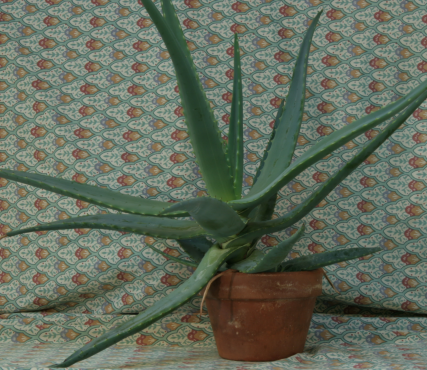

In [5]:
left_img = cv2.imread(left_img_path)
right_img = cv2.imread(right_img_path)

cv2_imshow(left_img)
cv2_imshow(right_img)

#### L1 distance

In [6]:
def l1_distance(x, y):
    return abs(x - y)

In [7]:
def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size =5, save_result=True):
    # Read left , right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height - kernel_half + 1):
        for x in range(kernel_half, width - kernel_half + 1):

            # Find j where cost has minimum value
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l1_distance(int(left[y + v, x + u]), int(right[y + v, (x + u) - j]))
                            total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j ( disparity )
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l1.png', depth)
        cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

In [8]:
window_based_result_1 = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result = True
)

Saving result...
Done.


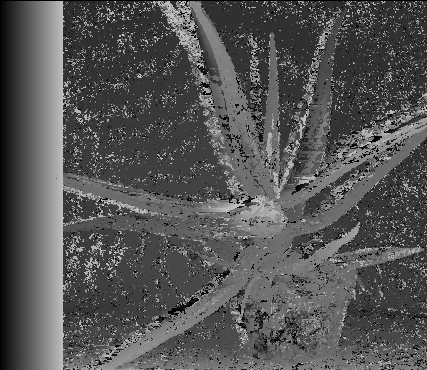

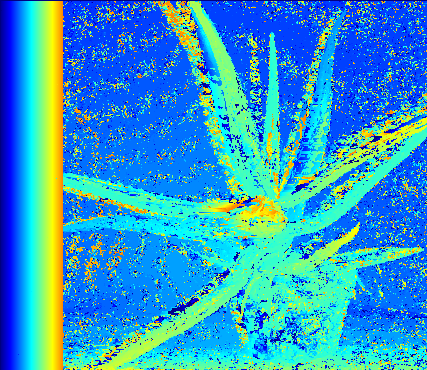

In [9]:
cv2_imshow(window_based_result_1)
cv2_imshow(cv2.applyColorMap(window_based_result_1, cv2.COLORMAP_JET))

#### L2 distance

In [10]:
def l2_distance(x, y):
    return (x - y)**2

In [11]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size =5, save_result=True):
    # Read left , right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 ** 2

    for y in range(kernel_half, height - kernel_half + 1):
        for x in range(kernel_half, width - kernel_half + 1):

            # Find j where cost has minimum value
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(int(left[y + v, x + u]), int(right[y + v, (x + u) - j]))
                            total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j ( disparity )
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l2.png', depth)
        cv2.imwrite(f'window_based_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

In [12]:
window_based_result_2 = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result = True
)

Saving result...
Done.


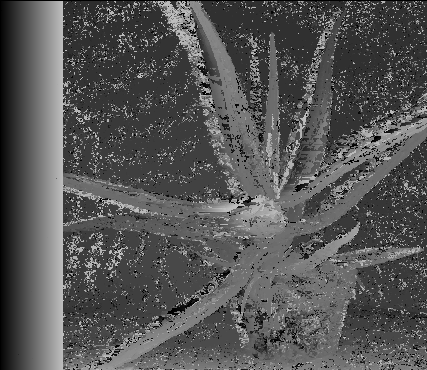

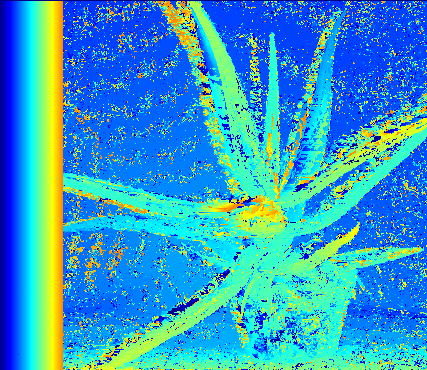

In [13]:
cv2_imshow(window_based_result_2)
cv2_imshow(cv2.applyColorMap(window_based_result_2, cv2.COLORMAP_JET))